* Architecture of a classification model - Ki·∫øn tr√∫c m√¥ h√¨nh ph√¢n lo·∫°i
* Input shapes and output shapes - Shape v√†o, ra
>* X: features/data (inputs) - ƒë·∫∑c tr∆∞ng, d·ªØ li·ªáu
>* y: labels (outputs) - nh√£n
>>* "What class do the inputs belong to?" - c√°c d·ªØ li·ªáu ƒë·∫ßu v√†o thu·ªôc l·ªõp n√†o
* Creating custom data to view and fit - T·∫°o d·ªØ li·ªáu t√πy ch·ªânh ƒë·ªÉ xem v√† ƒëi·ªÅu ch·ªânh
* Steps in modelling for binary and mutliclass classification- C√°c b∆∞·ªõc trong m√¥ h√¨nh h√≥a ƒë·ªÉ ph√¢n lo·∫°i nh·ªã ph√¢n v√† ƒëa l·ªõp
>* Creating a model -  t·∫°o m√¥ h√¨nh
>* Compiling a model - Bi√™n d·ªãch m√¥ h√¨nh
>>* Defining a loss function - x√°c ƒë·ªãnh h√†m m·∫•t m√°t
>>* Setting up an optimizer - Thi·∫øt l·∫≠p tr√¨nh t·ªëi ∆∞u h√≥a
>>>* Finding the best learning rate - T√¨m t·ªëc ƒë·ªô h·ªçc t·ªët nh·∫•t
>>*  Creating evaluation metrics - T·∫°o ch·ªâ s·ªë ƒë√°nh gi√°
>* Fitting a model (getting it to find patterns in our data) - H·ª£p m√¥ h√¨nh
>* Improving a model - C·∫£i ti·∫øn m·ªôt m√¥ h√¨nh
* The power of non-linearity - S·ª©c m·∫°nh c·ªßa phi tuy·∫øn t√≠nh
* Evaluating classification models - ƒê√°nh gi√° m√¥ h√¨nh ph√¢n lo·∫°i
>* Visualizng the model ("visualize, visualize, visualize") - H√¨nh dung
>* Looking at training curves - Xem x√©t ƒë∆∞·ªùng cong hu·∫•n luy·ªán
>* Compare predictions to ground truth (using our evaluation metrics) -  So s√°nh c√°c d·ª± ƒëo√°n v·ªõi s·ª± th·∫≠t c∆° b·∫£n

# **Typical architecture of a classification neural network**



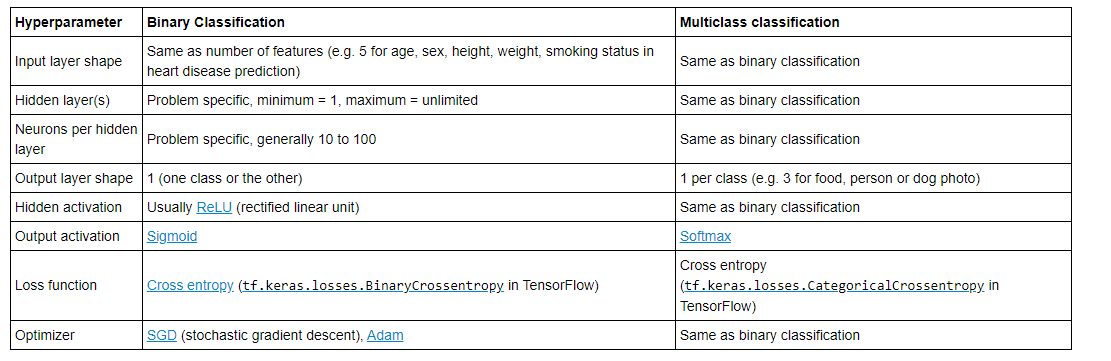

***Source:***  Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aur√©lien G√©ron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# **Creating data to view and fit**

Ch√∫ng ta c√≥ th·ªÉ b·∫Øt ƒë·∫ßu b·∫±ng c√°ch nh·∫≠p m·ªôt t·∫≠p d·ªØ li·ªáu ph√¢n lo·∫°i nh∆∞ng h√£y th·ª±c h√†nh t·∫°o m·ªôt s·ªë d·ªØ li·ªáu ph√¢n lo·∫°i c·ªßa ri√™ng ch√∫ng ta.

V√¨ ph√¢n lo·∫°i l√† d·ª± ƒëo√°n xem m·ªôt th·ª© l√† th·ª© n√†y hay th·ª© kh√°c, ch√∫ng ta h√£y t·∫°o m·ªôt s·ªë d·ªØ li·ªáu ƒë·ªÉ ph·∫£n √°nh ƒëi·ªÅu ƒë√≥.

Ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng h√†m `make_circles()` c·ªßa Scikit-Learn ƒë·ªÉ t·∫°o m·ªôt t·∫≠p d·ªØ li·ªáu m·∫´u .

In [ ]:
from sklearn.datasets import  make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0

In [ ]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Ch√∫ng ta ƒëang gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ ph√¢n lo·∫°i nh·ªã ph√¢n. N√≥ l√† h·ªá nh·ªã ph√¢n v√¨ ch·ªâ c√≥ hai nh√£n (0 ho·∫∑c 1).

Ch√∫ng ta h√£y h√¨nh dung th√™m m·ªôt b∆∞·ªõc v√† v·∫Ω bi·ªÉu ƒë·ªì d·ªØ li·ªáu c·ªßa ch√∫ng ta.

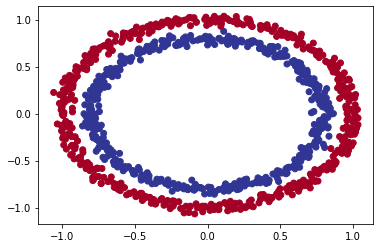

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# **Input and output shapes**

M·ªôt trong nh·ªØng v·∫•n ƒë·ªÅ ph·ªï bi·∫øn nh·∫•t s·∫Ω g·∫∑p ph·∫£i khi x√¢y d·ª±ng m·∫°ng n∆°-ron l√† h√¨nh d·∫°ng kh√¥ng kh·ªõp.

C·ª• th·ªÉ h∆°n l√† h√¨nh d·∫°ng c·ªßa d·ªØ li·ªáu ƒë·∫ßu v√†o v√† h√¨nh d·∫°ng c·ªßa d·ªØ li·ªáu ƒë·∫ßu ra.

V√¨ v·∫≠y, ch√∫ng ta h√£y ki·ªÉm tra h√¨nh d·∫°ng c·ªßa X v√† y

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Ch√∫ng ta c√≥ hai ƒë·∫∑c ƒëi·ªÉm X d·∫´n ƒë·∫øn m·ªôt gi√° tr·ªã y.

ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† h√¨nh d·∫°ng ƒë·∫ßu v√†o m·∫°ng n∆°-ron c·ªßa ch√∫ng ta s·∫Ω ph·∫£i ch·∫•p nh·∫≠n m·ªôt tensor c√≥ √≠t nh·∫•t m·ªôt chi·ªÅu l√† hai v√† ƒë·∫ßu ra tensor c√≥ √≠t nh·∫•t m·ªôt gi√° tr·ªã.

# **Steps in modelling**



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


Nh√¨n v√†o ch·ªâ s·ªë ƒë·ªô ch√≠nh x√°c, m√¥ h√¨nh c·ªßa ch√∫ng ta ho·∫°t ƒë·ªông k√©m (ƒë·ªô ch√≠nh x√°c 50% ƒë·ªëi v·ªõi m·ªôt b√†i to√°n ph√¢n lo·∫°i nh·ªã ph√¢n t∆∞∆°ng ƒë∆∞∆°ng v·ªõi vi·ªác ƒëo√°n), nh∆∞ng ƒëi·ªÅu g√¨ s·∫Ω x·∫£y ra n·∫øu ch√∫ng ta ƒë√†o t·∫°o n√≥ l√¢u h∆°n?

In [ ]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Ngay c·∫£ sau 200 l·∫ßn truy·ªÅn d·ªØ li·ªáu, n√≥ v·∫´n ho·∫°t ƒë·ªông nh∆∞ th·ªÉ n√≥ ƒëang ƒëo√°n.

ƒêi·ªÅu g√¨ s·∫Ω x·∫£y ra n·∫øu ch√∫ng ta th√™m m·ªôt l·ªõp b·ªï sung v√† ƒë√†o t·∫°o l√¢u h∆°n m·ªôt ch√∫t?

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

V·∫´n kh√¥ng t·ªët nh∆∞ d·ª± ƒëo√°n (ƒë·ªô ch√≠nh x√°c ~ 50%)?

# **Improving a model**



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

M√¥ h√¨nh v·∫´n ho·∫°t ƒë·ªông ch∆∞a ƒë∆∞·ª£c t·ªët

H√£y th·ª±c hi·ªán m·ªôt s·ªë h√¨nh dung ƒë·ªÉ xem ƒëi·ªÅu g√¨ ƒëang x·∫£y ra.\

ƒê·ªÉ h√¨nh dung c√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh, ch√∫ng ta s·∫Ω t·∫°o m·ªôt h√†m `plot_decision_boundary()` m√†:
* S·ª≠ d·ª•ng m√¥ h√¨nh ƒë∆∞·ª£c ƒë√†o t·∫°o, c√°c ƒë·∫∑c tr∆∞ng (X) v√† nh√£n (y).
* T·∫°o meshgrid c√°c gi√° tr·ªã X kh√°c nhau.
* ƒê∆∞a ra c√°c d·ª± ƒëo√°n tr√™n meshgrid
* V·∫Ω ƒë·ªì th·ªã cho c√°c d·ª± ƒëo√°n c≈©ng nh∆∞ m·ªôt ƒë∆∞·ªùng th·∫≥ng gi·ªØa c√°c khu v·ª±c kh√°c nhau (n∆°i m·ªói l·ªõp duy nh·∫•t r∆°i v√†o).

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


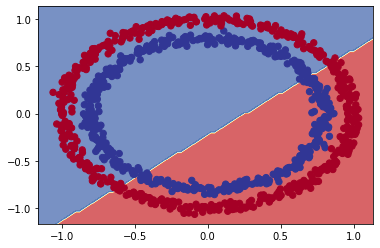

In [ ]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3, X, y)

C√≥ v·∫ª nh∆∞ m√¥ h√¨nh c·ªßa ch√∫ng ta ƒëang c·ªë g·∫Øng v·∫Ω m·ªôt ƒë∆∞·ªùng th·∫≥ng qua d·ªØ li·ªáu.

V·∫•n ƒë·ªÅ ch√≠nh l√† d·ªØ li·ªáu c·ªßa ch√∫ng ta kh√¥ng th·ªÉ ph√¢n t√°ch b·∫±ng m·ªôt ƒë∆∞·ªùng th·∫≥ng.

Trong m·ªôt b√†i to√°n h·ªìi quy, m√¥ h√¨nh c·ªßa ch√∫ng ta c√≥ th·ªÉ ho·∫°t ƒë·ªông. Trong th·ª±c t·∫ø, ch√∫ng ta h√£y th·ª≠ n√≥.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

ƒê∆∞·ª£c r·ªìi, c√≥ v·∫ª nh∆∞ m√¥ h√¨nh c·ªßa ch√∫ng ta ƒëang h·ªçc ƒë∆∞·ª£c ƒëi·ªÅu g√¨ ƒë√≥ (gi√° tr·ªã mae c√≥ xu h∆∞·ªõng gi·∫£m theo t·ª´ng epoch), h√£y v·∫Ω c√°c d·ª± ƒëo√°n c·ªßa n√≥.

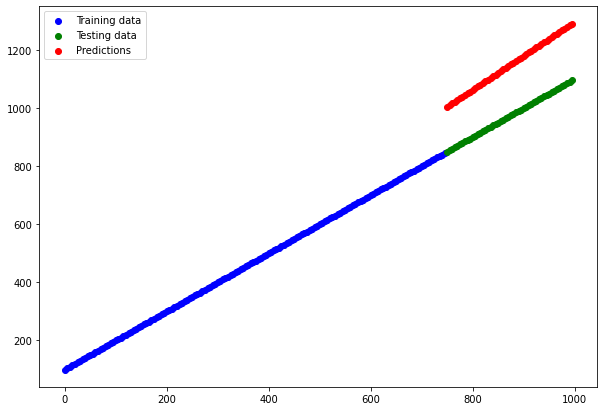

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Ta th·∫•y d·ª± ƒëo√°n kh√¥ng ho√†n h·∫£o (n·∫øu d·ª± ƒëo√°n ho√†n h·∫£o, m√†u ƒë·ªè s·∫Ω th·∫≥ng h√†ng v·ªõi m√†u xanh l√° c√¢y), nh∆∞ng ch√∫ng tr√¥ng ƒë·∫πp h∆°n so v·ªõi d·ª± ƒëo√°n ho√†n ch·ªânh.

V√¨ v·∫≠y, ƒëi·ªÅu n√†y c√≥ nghƒ©a l√† m√¥ h√¨nh c·ªßa ch√∫ng ta ph·∫£i h·ªçc ƒë∆∞·ª£c ƒëi·ªÅu g√¨ ƒë√≥ ..



# **The missing piece: Non-linearity**

V√¨ ch√∫ng ta ƒë√£ th·∫•y m·∫°ng n∆°-ron c·ªßa m√¨nh c√≥ th·ªÉ l·∫≠p m√¥ h√¨nh c√°c ƒë∆∞·ªùng th·∫≥ng (v·ªõi kh·∫£ nƒÉng t·ªët h∆°n m·ªôt ch√∫t so v·ªõi ƒëo√°n).

C√≤n ƒë·ªëi v·ªõi c√°c ƒë∆∞·ªùng kh√¥ng th·∫≥ng (phi tuy·∫øn t√≠nh) th√¨ sao?

N·∫øu ch√∫ng ta ƒë·ªãnh m√¥ h√¨nh h√≥a d·ªØ li·ªáu ph√¢n lo·∫°i c·ªßa m√¨nh (c√°c v√≤ng tr√≤n m√†u ƒë·ªè v√† ƒë·∫ßu m·ªëi), ch√∫ng ta s·∫Ω c·∫ßn m·ªôt s·ªë ƒë∆∞·ªùng phi tuy·∫øn t√≠nh.

Thay ƒë·ªïi ch√≠nh m√† ch√∫ng ta s·∫Ω th√™m v√†o c√°c m√¥ h√¨nh m√† ch√∫ng ta ƒë√£ x√¢y d·ª±ng tr∆∞·ªõc ƒë√¢y l√† vi·ªác s·ª≠ d·ª•ng t·ª´ kh√≥a k√≠ch ho·∫°t(`activation`).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" is short for "learning rate"
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6232 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1719 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2390 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7063 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8439 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2963 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3483 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1405 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9766 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.3387 - accuracy: 0.5161
Epoch 11/

ƒê∆∞·ª£c r·ªìi, m√¥ h√¨nh c·ªßa ch√∫ng t√¥i ho·∫°t ƒë·ªông k√©m h∆°n m·ªôt ch√∫t so v·ªõi ph·ªèng ƒëo√°n.

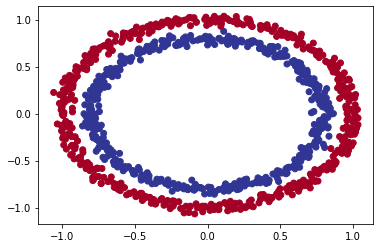

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

doing binary classifcation...


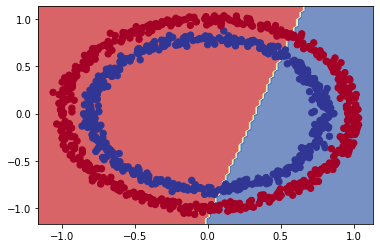

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

C√≥ v·∫ª nh∆∞ ch√∫ng ta l·∫°i nh·∫≠n ƒë∆∞·ª£c d·ª± ƒëo√°n ƒë∆∞·ªùng th·∫≥ng (tuy·∫øn t√≠nh).

Nh∆∞ng d·ªØ li·ªáu c·ªßa ch√∫ng t√¥i l√† phi tuy·∫øn t√≠nh (kh√¥ng ph·∫£i l√† m·ªôt ƒë∆∞·ªùng th·∫≥ng) 

Nh·ªØng g√¨ ch√∫ng ta s·∫Ω ph·∫£i l√†m l√† th√™m m·ªôt s·ªë kh√¥ng tuy·∫øn t√≠nh v√†o m√¥ h√¨nh.



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation='relu'), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.3881 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4914 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4194 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2703 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2634 - accuracy: 0.4301
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1211 - accuracy: 0.4480
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1487 - accuracy: 0.4294
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0766 - accuracy: 0.4462
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0989 - accuracy: 0.4236
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0058 - accuracy: 0.4796
Epoch 11/

K·∫øt qu·∫£ v·∫´n ch∆∞a ·ªïn 

Ch√∫ng ta s·∫Ω tƒÉng l·ªõp ·∫©n l√™n 4 trong m·ªói layer 

S·∫Ω th·ª≠ m√¥ ph·ªèng tr√™n [TensorFlow Playground demo.](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true&dataset_hide=true)

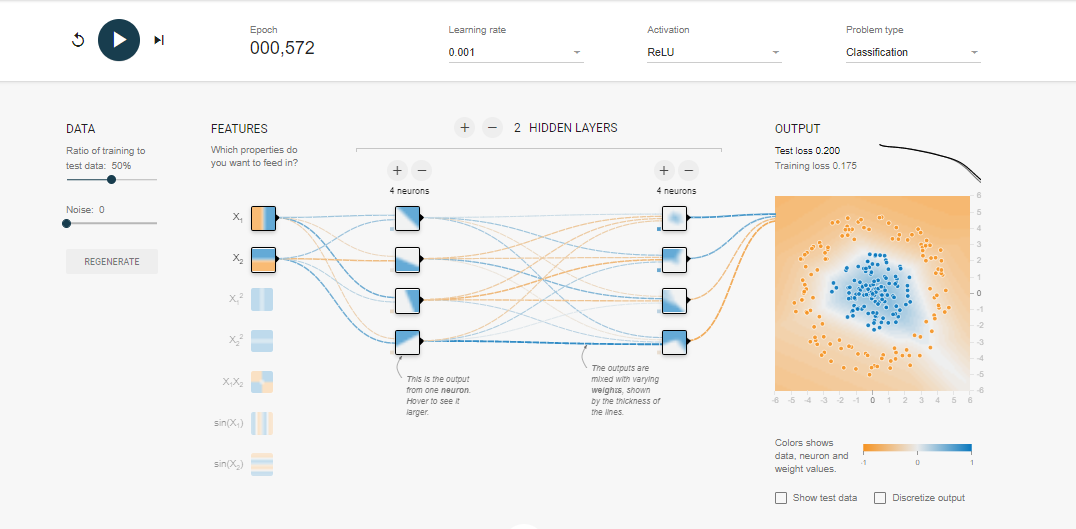

C√≥ v·∫ª m√¥ h√¨nh ho·∫°t ƒë·ªông kh√° t·ªët

ki·ªÉm tra b·∫±ng code

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation='relu'), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=600)

Epoch 1/600
32/32 [==============================] - 1s 1ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/600
32/32 [==============================] - 0s 1ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/600
32/32 [==============================] - 0s 1ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/600
32/32 [==============================] - 0s 1ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/600
32/32 [==============================] - 0s 1ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/600
32/32 [==============================] - 0s 1ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/600
32/32 [==============================] - 0s 1ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/600
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/600
32/32 [==============================] - 0s 1ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/600
32/32 [==============================] - 0s 1ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 959us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


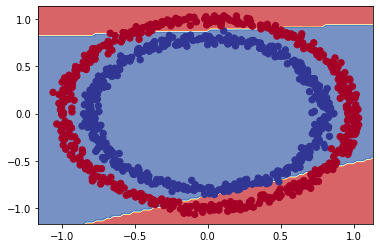

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

M√¥ h√¨nh c·ªßa ch√∫ng ta gi·ªëng v·ªõi m√¥ h√¨nh trong  TensorFlow Playground nh∆∞ng m√¥ h√¨nh ƒë√≥ v·∫´n v·∫Ω c√°c ƒë∆∞·ªùng th·∫≥ng ..

L√Ω t∆∞·ªüng nh·∫•t l√† c√°c ƒë∆∞·ªùng m√†u v√†ng n·∫±m b√™n trong v√≤ng tr√≤n m√†u ƒë·ªè v√† v√≤ng tr√≤n m√†u xanh lam.

L·∫ßn n√†y, ch√∫ng ta c≈©ng s·∫Ω thay ƒë·ªïi gi√° tr·ªã `activation` tr√™n l·ªõp ƒë·∫ßu ra c·ªßa ch√∫ng t√¥i. H√£y nh·ªõ ki·∫øn ‚Äã‚Äãtr√∫c c·ªßa m·ªôt m√¥ h√¨nh ph√¢n lo·∫°i? ƒê·ªëi v·ªõi ph√¢n lo·∫°i nh·ªã ph√¢n, k√≠ch ho·∫°t l·ªõp ƒë·∫ßu ra th∆∞·ªùng l√† gi√° tr·ªã `activation`= `Sigmoid`.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation= 'relu'), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation= 'relu'), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation= 'sigmoid') # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480037093162537, 0.9909999966621399]

K·∫øt qu·∫£ nh·∫≠n ƒë∆∞·ª£c r·∫•t t·ªët


doing binary classifcation...


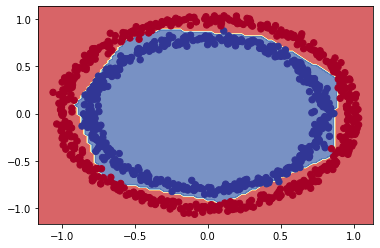

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

 M√¥ h√¨nh c·ªßa ch√∫ng ta g·∫ßn nh∆∞ ho√†n h·∫£o (ngo·∫°i tr·ª´ m·ªôt v√†i v√≠ d·ª•) t√°ch hai v√≤ng tr√≤n.


# **Evaluating and improving our classification model**

Ch√∫ng ta ƒë√£ ƒë√°nh gi√° m√¥ h√¨nh c·ªßa m√¨nh tr√™n c√πng d·ªØ li·ªáu m√† n√≥ ƒë√£ ƒë∆∞·ª£c ƒë√†o t·∫°o.

M·ªôt c√°ch ti·∫øp c·∫≠n t·ªët h∆°n s·∫Ω l√† chia d·ªØ li·ªáu c·ªßa ch√∫ng ta th√†nh c√°c t·∫≠p hu·∫•n luy·ªán, x√°c th·ª±c (t√πy ch·ªçn) v√† th·ª≠ nghi·ªám.

Khi ch√∫ng ta ƒë√£ l√†m xong, ch√∫ng ta s·∫Ω ƒë√†o t·∫°o m√¥ h√¨nh c·ªßa m√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán (ƒë·ªÉ n√≥ t√¨m c√°c m·∫´u trong d·ªØ li·ªáu) v√† sau ƒë√≥ xem n√≥ ƒë√£ h·ªçc c√°c m·∫´u t·ªët nh∆∞ th·∫ø n√†o b·∫±ng c√°ch s·ª≠ d·ª•ng n√≥ ƒë·ªÉ d·ª± ƒëo√°n c√°c gi√° tr·ªã tr√™n t·∫≠p th·ª≠ nghi·ªám.

In [ ]:
# How many examples are in the whole dataset?
len(X)

1000

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


In [ ]:
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

Model loss on the test set: 0.12468849867582321
Model accuracy on the test set: 100.00%


100% accuracy

doing binary classifcation...
doing binary classifcation...


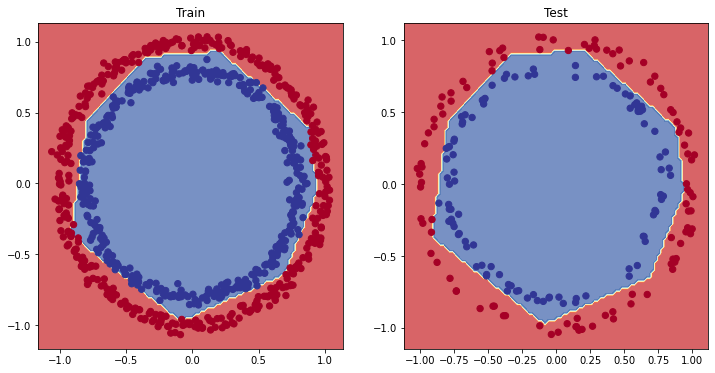

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

V·ªõi m·ªôt v√†i ch·ªânh s·ª≠a, m√¥ h√¨nh c·ªßa ch√∫ng ta hi·ªán d·ª± ƒëo√°n c√°c v√≤ng tr√≤n m√†u xanh v√† ƒë·ªè g·∫ßn nh∆∞ ho√†n h·∫£o.

# **Plot the loss curves**

Ch√∫ng ta c√≥ th·ªÉ th·∫•y k·∫øt qu·∫£ ƒë·∫ßu ra c·ªßa m√¥ h√¨nh l√† r·∫•t t·ªët.

Nh∆∞ng m√¥ h√¨nh c·ªßa ch√∫ng ta ho·∫°t ƒë·ªông nh∆∞ th·∫ø n√†o trong khi n√≥ ƒëang h·ªçc h·ªèi?

Hi·ªáu su·∫•t thay ƒë·ªïi nh∆∞ th·∫ø n√†o m·ªói khi m√¥ h√¨nh c√≥ c∆° h·ªôi xem x√©t d·ªØ li·ªáu (m·ªói epoch m·ªôt l·∫ßn)?

ƒê·ªÉ t√¨m ra ƒëi·ªÅu n√†y, ch√∫ng ta c√≥ th·ªÉ ki·ªÉm tra c√°c ƒë∆∞·ªùng cong t·ªïn th·∫•t(**loss curves**) (c√≤n ƒë∆∞·ª£c g·ªçi l√† ƒë∆∞·ªùng cong h·ªçc t·∫≠p(**learning curves**)).



In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

loss  accuracy
0   0.684651   0.54250
1   0.677721   0.55250
2   0.673595   0.55125
3   0.668149   0.57750
4   0.663269   0.58500
5   0.654567   0.58375
6   0.641258   0.67500
7   0.626428   0.70125
8   0.603831   0.74875
9   0.571404   0.77375
10  0.540443   0.76500
11  0.501504   0.78375
12  0.468332   0.79750
13  0.411302   0.84500
14  0.362506   0.91250
15  0.320904   0.93125
16  0.284708   0.94875
17  0.259720   0.95250
18  0.237469   0.95625
19  0.213520   0.96625
20  0.193820   0.97750
21  0.175244   0.97375
22  0.161893   0.97875
23  0.154989   0.97750
24  0.148973   0.97625

Ki·ªÉm tra k·∫øt qu·∫£ ƒë·∫ßu ra, ch√∫ng ta c√≥ th·ªÉ th·∫•y gi√° tr·ªã t·ªïn th·∫•t gi·∫£m xu·ªëng v√† ƒë·ªô ch√≠nh x√°c tƒÉng l√™n.

Text(0.5, 1.0, 'Model_8 training curves')

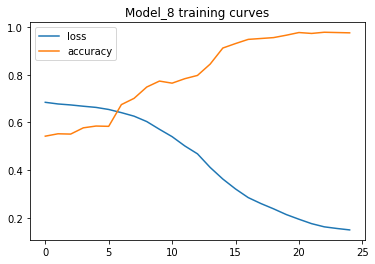

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

# **Finding the best learning rate**

Ngo√†i b·∫£n th√¢n ki·∫øn ‚Äã‚Äãtr√∫c (c√°c l·ªõp, s·ªë l∆∞·ª£ng t·∫ø b√†o th·∫ßn kinh, k√≠ch ho·∫°t, v.v.), si√™u tham s·ªë quan tr·ªçng nh·∫•t m√† ta c√≥ th·ªÉ ƒëi·ªÅu ch·ªânh cho c√°c m√¥ h√¨nh m·∫°ng th·∫ßn kinh c·ªßa m√¨nh l√† t·ªëc ƒë·ªô h·ªçc(**learning rate**).

Trong model_8, ch√∫ng ta ƒë√£ gi·∫£m t·ª∑ l·ªá h·ªçc t·∫≠p c·ªßa tr√¨nh t·ªëi ∆∞u h√≥a Adam t·ª´ m·∫∑c ƒë·ªãnh l√† 0,001 (m·∫∑c ƒë·ªãnh) xu·ªëng 0,01.

Th·ªß thu·∫≠t t√¨m **learning rate** t·ªëi ∆∞u
* A learning rate callback 
* M·ªôt m√¥ h√¨nh kh√°c.
* M·ªôt bi·ªÉu ƒë·ªì ƒë∆∞·ªùng cong t·ªïn th·∫•t ƒë√£ s·ª≠a ƒë·ªïi.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

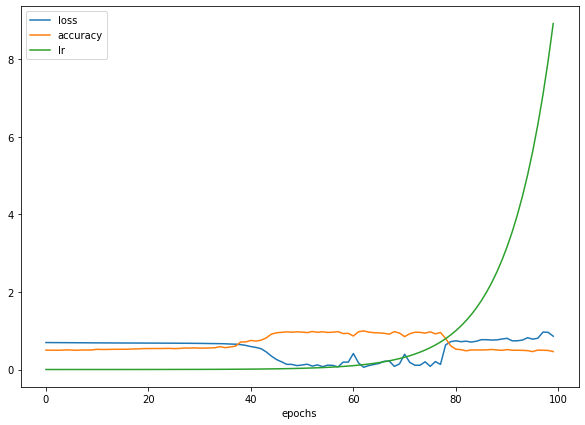

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Ta th·∫•y **learning rate** tƒÉng l√™n theo c·∫•p s·ªë nh√¢n khi s·ªë l∆∞·ª£ng epoch tƒÉng l√™n

C√≥ th·ªÉ th·∫•y ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh tƒÉng l√™n (v√† m·∫•t m√°t gi·∫£m xu·ªëng) t·∫°i m·ªôt th·ªùi ƒëi·ªÉm c·ª• th·ªÉ khi **learning rate** tƒÉng d·∫ßn.

ƒê·ªÉ t√¨m ra ƒëi·ªÉm u·ªën n√†y ·ªü ƒë√¢u, ch√∫ng ta c√≥ th·ªÉ v·∫Ω bi·ªÉu ƒë·ªì t·ªïn th·∫•t so v·ªõi t·ª∑ l·ªá h·ªçc t·∫≠p theo thang `log`.

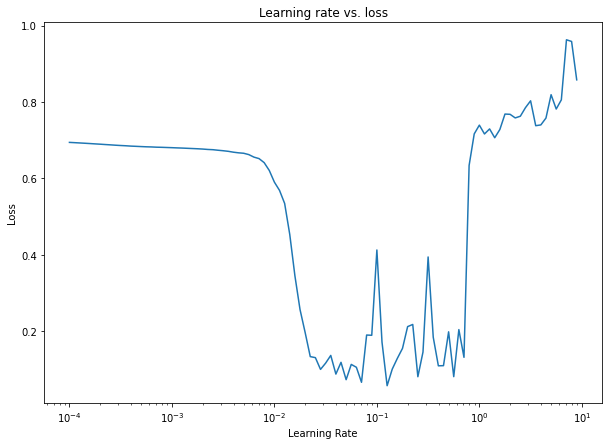

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

ƒê·ªÉ t√¨m ra gi√° tr·ªã l√Ω t∆∞·ªüng c·ªßa **learning rate** (√≠t nh·∫•t l√† gi√° tr·ªã l√Ω t∆∞·ªüng ƒë·ªÉ b·∫Øt ƒë·∫ßu ƒë√†o t·∫°o m√¥ h√¨nh c·ªßa ch√∫ng ta), quy t·∫Øc chung l√† l·∫•y gi√° tr·ªã **learning rate** m√† t·ªïn th·∫•t v·∫´n gi·∫£m nh∆∞ng kh√¥ng qu√° ph·∫≥ng (th∆∞·ªùng nh·ªè h∆°n kho·∫£ng 10 l·∫ßn so v·ªõi ƒë√°y c·ªßa ƒë∆∞·ªùng cong).

Trong tr∆∞·ªùng h·ª£p n√†y, t·ª∑ l·ªá h·ªçc t·∫≠p l√Ω t∆∞·ªüng c·ªßa ch√∫ng ta k·∫øt th√∫c trong kho·∫£ng 0,01 ƒë·∫øn 0,02.

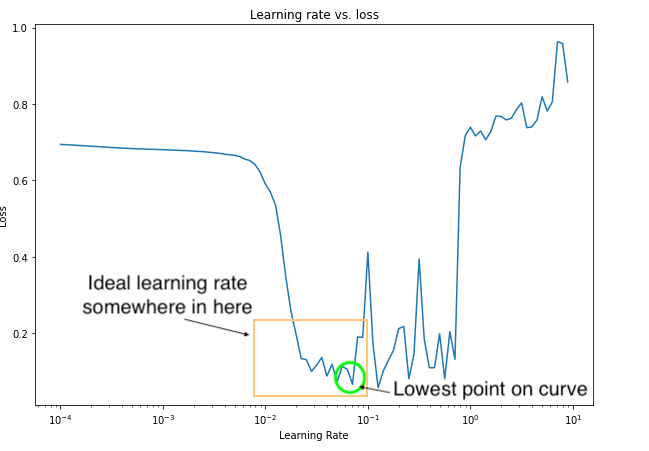

**learning rate** l√Ω t∆∞·ªüng khi b·∫Øt ƒë·∫ßu ƒë√†o t·∫°o m√¥ h√¨nh l√† ·ªü ƒë√¢u ƒë√≥ ngay tr∆∞·ªõc khi ƒë∆∞·ªùng cong t·ªïn th·∫•t ch·∫°m ƒë√°y (m·ªôt gi√° tr·ªã m√† t·ªïn th·∫•t v·∫´n ƒëang gi·∫£m).

B√¢y gi·ªù ch√∫ng ta ƒë√£ ∆∞·ªõc t√≠nh t·ª∑ l·ªá **learning rate** (ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng 0,02) cho m√¥ h√¨nh c·ªßa m√¨nh

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/20
25/25 [

V·ªõi **learning rate** cao h∆°n m·ªôt ch√∫t (0,02 thay v√¨ 0,01), ch√∫ng ta ƒë·∫°t ƒë·ªô ch√≠nh x√°c cao h∆°n model_8 trong √≠t epoch h∆°n (20 thay v√¨ 25).

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

doing binary classifcation...
doing binary classifcation...


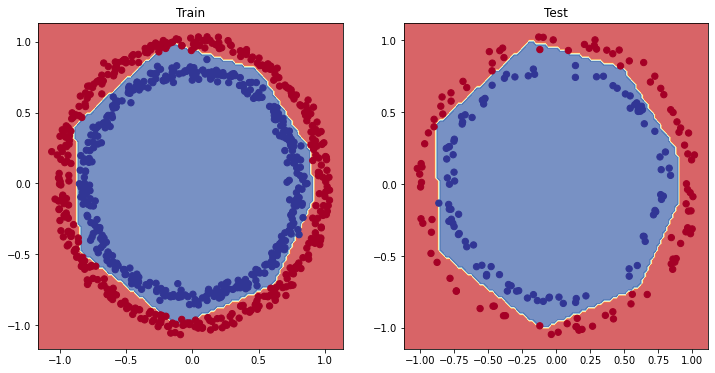

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

Nh∆∞ ch√∫ng ta c√≥ th·ªÉ th·∫•y, g·∫ßn nh∆∞ ho√†n h·∫£o m·ªôt l·∫ßn n·ªØa

ƒê√¢y l√† nh·ªØng lo·∫°i th·ª≠ nghi·ªám ta s·∫Ω ch·∫°y th∆∞·ªùng xuy√™n khi x√¢y d·ª±ng m√¥ h√¨nh c·ªßa ri√™ng m√¨nh



**More classification evaluation methods**



| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

M·ªói v·∫•n ƒë·ªÅ ph√¢n lo·∫°i s·∫Ω y√™u c·∫ßu c√°c lo·∫°i ph∆∞∆°ng ph√°p ƒë√°nh gi√° kh√°c nhau.

# **confusion matrix**

Trong c√°c b√†i to√°n ph√¢n lo·∫°i, confusion matrix l√† m·ªôt b·∫£ng ƒë·∫∑c bi·ªát ƒë∆∞·ª£c d√πng ƒë·ªÉ minh h·ªça hi·ªáu qu·∫£ c·ªßa c√°c thu·∫≠t to√°n..

Ch√∫ng ta c√≥ th·ªÉ t·∫°o mconfusion matrix b·∫±ng c√°ch s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p `confusion_matrix` c·ªßa Scikit-Learn.

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# Make predictions
y_preds = model_10.predict(X_test)

In [ ]:
y_preds[:5]

array([[0.9852654 ],
       [0.9992379 ],
       [0.9903234 ],
       [0.9970695 ],
       [0.39622882]], dtype=float32)

Ch√∫ng ta c·∫ßn ƒë∆∞a c√°c d·ª± ƒëo√°n c·ªßa m√¨nh sang ƒë·ªãnh d·∫°ng nh·ªã ph√¢n (0 ho·∫∑c 1).

·ªû ƒë·ªãnh d·∫°ng hi·ªán t·∫°i (9.8526537e-01), ch√∫ng ·ªü d·∫°ng ƒë∆∞·ª£c g·ªçi l√† x√°c su·∫•t d·ª± ƒëo√°n.

V√¨ v·∫≠y, m·ªôt trong nh·ªØng b∆∞·ªõc th∆∞·ªùng th·∫•y sau khi ƒë∆∞a ra d·ª± ƒëo√°n v·ªõi m·∫°ng n∆°-ron l√† chuy·ªÉn ƒë·ªïi x√°c su·∫•t d·ª± ƒëo√°n th√†nh nh√£n.

v√¨ nh√£n ƒë√∫ng c∆° b·∫£n c·ªßa ch√∫ng ta (y_test) l√† nh·ªã ph√¢n (0 ho·∫∑c 1), ch√∫ng ta c√≥ th·ªÉ chuy·ªÉn ƒë·ªïi x√°c su·∫•t d·ª± ƒëo√°n b·∫±ng c√°ch s·ª≠ d·ª•ng sang d·∫°ng nh·ªã ph√¢n c·ªßa ch√∫ng b·∫±ng c√°ch s·ª≠ d·ª•ng `tf.round()`.

In [ ]:
y_preds = tf.round(y_preds)
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

Ch√∫ng ta c√≥ th·ªÉ th·∫•y nh·ªØng con s·ªë cao nh·∫•t n·∫±m d·ªçc theo ƒë∆∞·ªùng ch√©o (t·ª´ tr√™n c√πng b√™n tr√°i xu·ªëng d∆∞·ªõi c√πng b√™n ph·∫£i) v√¨ v·∫≠y ƒë√¢y l√† m·ªôt d·∫•u hi·ªáu t·ªët, nh∆∞ng ph·∫ßn c√≤n l·∫°i c·ªßa ma tr·∫≠n kh√¥ng th·ª±c s·ª± cho ch√∫ng ta bi·∫øt nhi·ªÅu.

Tr·ª±c quan h√≥a confusion matrix

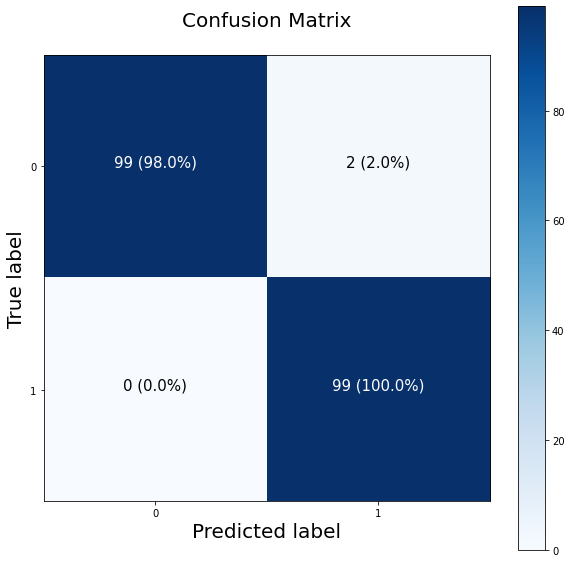

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# **Working with a larger example (multiclass classification)**

ƒê·ªÉ b·∫Øt ƒë·∫ßu, ch√∫ng ta s·∫Ω c·∫ßn m·ªôt s·ªë d·ªØ li·ªáu. ƒêi·ªÅu t·ªët cho ch√∫ng ta l√† TensorFlow c√≥ m·ªôt t·∫≠p d·ªØ li·ªáu c·ªï ƒëi·ªÉn ƒëa l·ªõp ƒë∆∞·ª£c g·ªçi l√† Fashion MNIST ƒë∆∞·ª£c t√≠ch h·ª£p s·∫µn. C√≥ nghƒ©a l√† ch√∫ng ta c√≥ th·ªÉ b·∫Øt ƒë·∫ßu ngay l·∫≠p t·ª©c.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

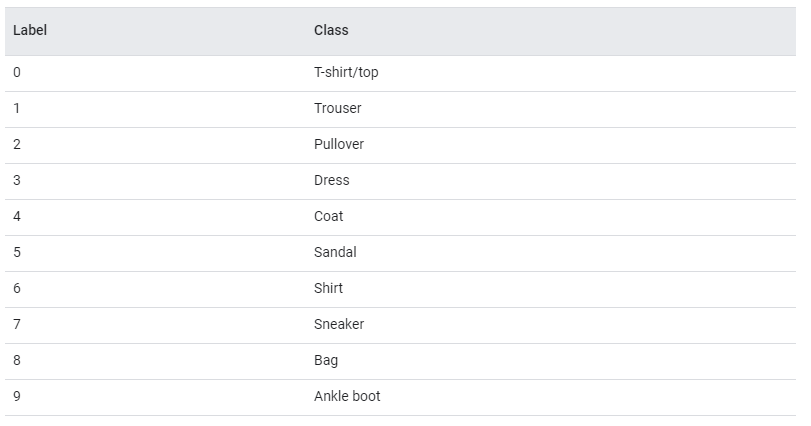

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

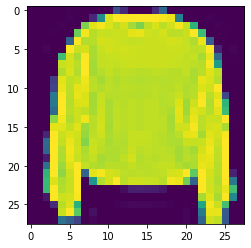

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:

# Check our samples label
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

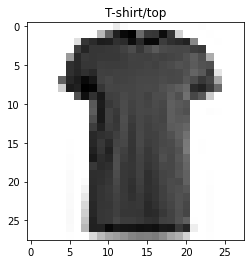

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

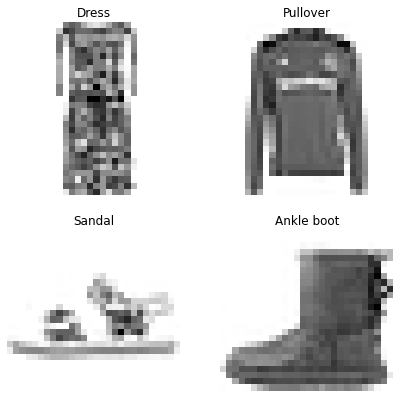

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Ok, h√£y x√¢y d·ª±ng m·ªôt m√¥ h√¨nh ƒë·ªÉ t√¨m ra m·ªëi quan h·ªá gi·ªØa c√°c gi√° tr·ªã pixel v√† nh√£n c·ªßa ch√∫ng.

V√¨ ƒë√¢y l√† v·∫•n ƒë·ªÅ ph√¢n lo·∫°i nhi·ªÅu l·ªõp, ch√∫ng ta s·∫Ω c·∫ßn th·ª±c hi·ªán m·ªôt v√†i thay ƒë·ªïi ƒë·ªëi v·ªõi ki·∫øn ‚Äã‚Äãtr√∫c c·ªßa m√¨nh:

* **Input shape** v√†o s·∫Ω ph·∫£i x·ª≠ l√Ω c√°c tensors 28x28 (chi·ªÅu cao v√† chi·ªÅu r·ªông c·ªßa h√¨nh ·∫£nh c·ªßa ch√∫ng ta)
* **Output shape** s·∫Ω ph·∫£i l√† 10 v√¨ ch√∫ng ta c·∫ßn m√¥ h√¨nh c·ªßa m√¨nh ƒë·ªÉ d·ª± ƒëo√°n cho 10 l·ªõp kh√°c nhau
>> Ch√∫ng ta s·∫Ω thay ƒë·ªïi `activation parameter` c·ªßa l·ªõp ƒë·∫ßu ra th√†nh `softmax` thay v√¨ `sigmoid`, 
* Ch√∫ng ta s·∫Ω c·∫ßn thay ƒë·ªïi h√†m t·ªïn th·∫•t c·ªßa m√¨nh t·ª´ h√†m t·ªïn th·∫•t nh·ªã ph√¢n th√†nh h√†m t·ªïn th·∫•t ƒëa l·ªõp. 
>> C·ª• th·ªÉ h∆°n, v√¨ c√°c nh√£n c·ªßa ch√∫ng ta ·ªü d·∫°ng s·ªë nguy√™n, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng `tf.keras.losses.SparseCategoricalCrossentropy()`, n·∫øu c√°c nh√£n c·ªßa ch√∫ng ta ƒë∆∞·ª£c m√£ h√≥a m·ªôt l·∫ßn (v√≠ d·ª•: ch√∫ng tr√¥ng gi·ªëng nh∆∞ [0, 0, 1, 0, 0. ..]), ch√∫ng t√¥i s·∫Ω s·ª≠ d·ª•ng `tf.keras.losses.CategoricalCrossentropy()`.
* Ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng `validation_data parameter` khi `fit()`. ƒêi·ªÅu n√†y s·∫Ω cung c·∫•p cho ch√∫ng ta √Ω t∆∞·ªüng v·ªÅ c√°ch m√¥ h√¨nh ho·∫°t ƒë·ªông tr√™n b·ªô th·ª≠ nghi·ªám trong qu√° tr√¨nh ƒë√†o t·∫°o.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [ ]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


M√¥ h√¨nh c·ªßa ch√∫ng ta c√≥ ƒë·ªô ch√≠nh x√°c kho·∫£ng ~ 35% sau 10 epoch b·∫±ng c√°ch s·ª≠ d·ª•ng m√¥ h√¨nh ki·ªÉu t∆∞∆°ng t·ª± nh∆∞ nh·ªØng g√¨ ch√∫ng ta ƒë√£ s·ª≠ d·ª•ng trong v·∫•n ƒë·ªÅ ph√¢n lo·∫°i nh·ªã ph√¢n c·ªßa m√¨nh

D·ªØ li·ªáu ch√∫ng ta c√≥ kh√¥ng n·∫±m trong kho·∫£ng t·ª´ 0 ƒë·∫øn 1, n√≥i c√°ch kh√°c, n√≥ kh√¥ng ƒë∆∞·ª£c chu·∫©n h√≥a. Gi√° tr·ªã pixel c·ªßa n√≥ n·∫±m trong kho·∫£ng t·ª´ 0 ƒë·∫øn 255.

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Ch√∫ng ta c√≥ th·ªÉ nh·∫≠n c√°c gi√° tr·ªã n√†y t·ª´ 0 ƒë·∫øn 1 b·∫±ng c√°ch chia to√†n b·ªô m·∫£ng cho gi√° tr·ªã l·ªõn nh·∫•t: 255.0 (chia cho float c≈©ng chuy·ªÉn th√†nh float).



In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

B√¢y gi·ªù d·ªØ li·ªáu c·ªßa ch√∫ng ta n·∫±m trong kho·∫£ng t·ª´ 0 ƒë·∫øn 1. H√£y xem ƒëi·ªÅu g√¨ s·∫Ω x·∫£y ra khi ch√∫ng ta l·∫≠p m√¥ h√¨nh.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

M√¥ h√¨nh c·ªßa ch√∫ng ta ƒë√£ c√≥ ƒë·ªô ch√≠nh x√°c tƒÉng r·∫•t nhi·ªÅu so v·ªõi tr∆∞·ªõc ƒë√≥

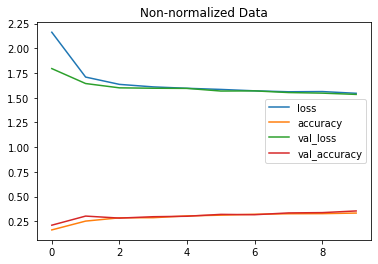

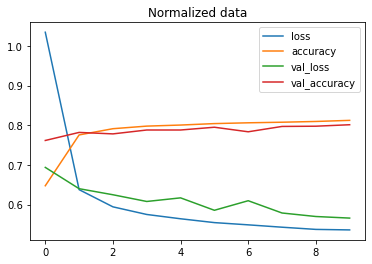

In [ ]:

import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

T·ª´ hai bi·ªÉu ƒë·ªì n√†y, ch√∫ng ta c√≥ th·ªÉ th·∫•y m√¥ h√¨nh c·ªßa ch√∫ng ta v·ªõi d·ªØ li·ªáu chu·∫©n h√≥a (model_12) ƒë∆∞·ª£c c·∫£i thi·ªán nhanh h∆°n bao nhi√™u so v·ªõi m√¥ h√¨nh c√≥ d·ªØ li·ªáu kh√¥ng chu·∫©n h√≥a (model_11).

> üîë **Note:** C√πng m·ªôt m√¥ h√¨nh v·ªõi d·ªØ li·ªáu th·∫≠m ch√≠ h∆°i kh√°c nhau c√≥ th·ªÉ t·∫°o ra c√°c k·∫øt qu·∫£ kh√°c nhau ƒë√°ng k·ªÉ. V√¨ v·∫≠y, khi so s√°nh c√°c m√¥ h√¨nh, ƒëi·ªÅu quan tr·ªçng l√† ph·∫£i ƒë·∫£m b·∫£o r·∫±ng b·∫°n ƒëang so s√°nh ch√∫ng tr√™n c√πng m·ªôt ti√™u ch√≠ (v√≠ d·ª•: c√πng m·ªôt ki·∫øn ‚Äã‚Äãtr√∫c nh∆∞ng d·ªØ li·ªáu kh√°c nhau ho·∫∑c c√πng m·ªôt d·ªØ li·ªáu nh∆∞ng ki·∫øn ‚Äã‚Äãtr√∫c kh√°c nhau)



**Finding learning rate**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

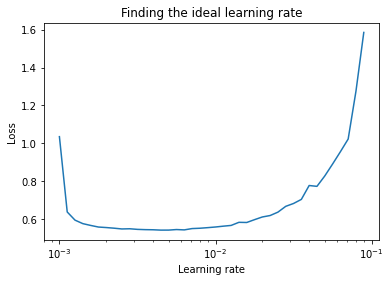

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

C√≥ v·∫ª nh∆∞ m·ªôt n∆°i n√†o ƒë√≥ g·∫ßn v·ªõi t·ªëc ƒë·ªô h·ªçc m·∫∑c ƒë·ªãnh c·ªßa  **`Adam optimer`**  (0,001) l√† t·ªëc ƒë·ªô h·ªçc l√Ω t∆∞·ªüng

H√£y H·ª£p l·∫°i m·ªôt m√¥ h√¨nh b·∫±ng c√°ch s·ª≠ d·ª•ng t·ª∑ l·ªá h·ªçc t·∫≠p l√Ω t∆∞·ªüng

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

B√¢y gi·ªù ch√∫ng ta ƒë√£ c√≥ m·ªôt m√¥ h√¨nh ƒë∆∞·ª£c ƒë√†o t·∫°o v·ªõi t·ª∑ l·ªá h·ªçc t·∫≠p g·∫ßn l√Ω t∆∞·ªüng v√† ho·∫°t ƒë·ªông kh√° t·ªët, ch√∫ng ta c√≥ m·ªôt v√†i l·ª±a ch·ªçn.

Ch√∫ng ta c√≥ th·ªÉ:
* ƒê√°nh gi√° hi·ªáu su·∫•t c·ªßa n√≥ b·∫±ng c√°ch s·ª≠ d·ª•ng c√°c s·ªë li·ªáu ph√¢n lo·∫°i kh√°c ( Ch·∫≥ng h·∫°n nh∆∞ **confusion matri** hay **classification report**)
* ƒê√°nh gi√° m·ªôt s·ªë d·ª± ƒëo√°n c·ªßa n√≥ (th√¥ng qua h√¨nh ·∫£nh h√≥a)
* C·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c c·ªßa n√≥ (b·∫±ng c√°ch ƒë√†o t·∫°o n√≥ l√¢u h∆°n ho·∫∑c thay ƒë·ªïi ki·∫øn ‚Äã‚Äãtr√∫c).
* L∆∞u v√† xu·∫•t n√≥ ƒë·ªÉ s·ª≠ d·ª•ng trong m·ªôt ·ª©ng d·ª•ng


Ch√∫ng ta s·∫Ω t·∫°o m·ªôt ma tr·∫≠n ph√¢n lo·∫°i ƒë·ªÉ tr·ª±c quan h√≥a c√°c d·ª± ƒëo√°n c·ªßa n√≥ tr√™n c√°c l·ªõp kh√°c nhau.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

V√¨ m·ªôt confusion matrix so s√°nh c√°c nh√£n ch√¢n l√Ω (test_labels) v·ªõi nh√£n d·ª± ƒëo√°n, ch√∫ng ta ph·∫£i ƒë∆∞a ra m·ªôt s·ªë d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh c·ªßa m√¨nh.

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

M√¥ h√¨nh c·ªßa ch√∫ng ta ƒë∆∞a ra m·ªôt danh s√°ch c√°c x√°c su·∫•t d·ª± ƒëo√°n, nghƒ©a l√†, n√≥ xu·∫•t ra m·ªôt con s·ªë v·ªÅ kh·∫£ nƒÉng n√≥ nghƒ© r·∫±ng m·ªôt l·ªõp c·ª• th·ªÉ l√† nh√£n.

Con s·ªë trong danh s√°ch x√°c su·∫•t d·ª± ƒëo√°n c√†ng cao, m√¥ h√¨nh c√†ng c√≥ nhi·ªÅu kh·∫£ nƒÉng tin r·∫±ng ƒë√≥ l√† l·ªõp ph√π h·ª£p.

ƒê·ªÉ t√¨m gi√° tr·ªã cao nh·∫•t, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c `argmax()`.

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

B√¢y gi·ªù ch√∫ng ta h√£y l√†m t∆∞∆°ng t·ª± cho t·∫•t c·∫£ c√°c d·ª± ƒëo√°n.

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

B√¢y gi·ªù ch√∫ng ta ƒë√£ c√≥ c√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh c·ªßa ch√∫ng ta ·ªü d·∫°ng nh√£n, h√£y t·∫°o m·ªôt confusion matrix ƒë·ªÉ xem ch√∫ng d·ª±a tr√™n nh√£n s·ª± th·∫≠t

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

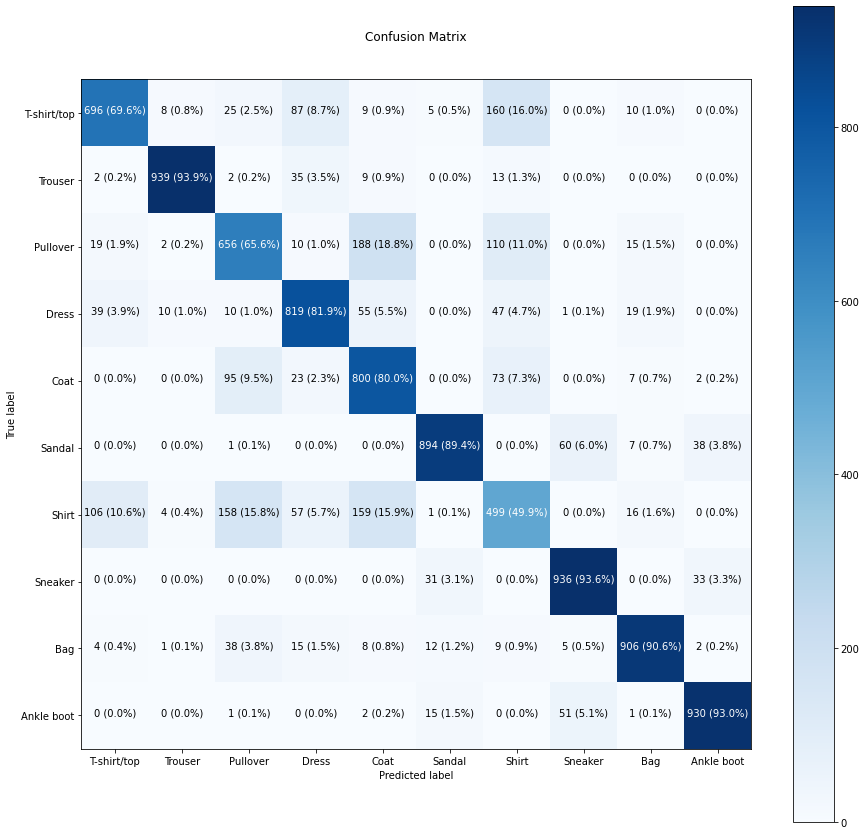

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

C√≥ v·∫ª nh∆∞ m√¥ h√¨nh c·ªßa ch√∫ng ta ƒëang b·ªã nh·∫ßm l·∫´n gi·ªØa `Shirt` v√† `T-shirt/top`  (v√≠ d·ª•: d·ª± ƒëo√°n √Åo s∆° mi khi ƒë√≥ th·ª±c s·ª± l√† √°o ph√¥ng / √°o ph√¥ng).


H√£y t·∫°o m·ªôt h√†m ƒë·ªÉ v·∫Ω m·ªôt h√¨nh ·∫£nh ng·∫´u nhi√™n c√πng v·ªõi d·ª± ƒëo√°n c·ªßa n√≥.

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

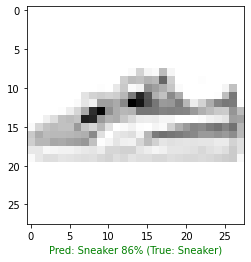

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)